## grid segmentation histogram

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pylab import *
import argparse
from skimage import io



def grid_segmentation_histogram(img,mode,split,number,plot):
    
    if isinstance(split, int)==False or isinstance(number, int)==False:
        print("只能輸入整數!")
           
    image = cv2.imread(img)
    image_rgb = Image.fromarray(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                           # 轉為灰階
    # gray_rgb = Image.fromarray(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
   
    original_shape = image.shape
    l=original_shape[1]
    w=original_shape[0]

    if w>l:
        resize = cv2.resize(image, (w, w))
        cm = round(w/split)
        resize =cv2.resize(resize, (split*cm, split*cm))
       
    else:
        resize = cv2.resize(image, (l, l))
        cm = round(l/split)
        resize = cv2.resize(resize, (split*cm, split*cm))
    
    gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    (mean , stddv) = cv2.meanStdDev(gray)
             
    new_shape=resize.shape    
    new_side_length=resize.shape[0]
    print(f"image shape from {original_shape} to {new_shape}")
        
    resize_rgb = Image.fromarray(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))
    total_block=split*split
    
    # 製作九宮格   
    
    xmin_list=[]
    ymin_list=[]
    xmax_list=[]
    ymax_list=[]
    
    xmin=0
    cm_2=cm
    xmax=cm
    for i in range(split):
        
        xmin_list.append(xmin)       
        xmin=xmin+cm
        xmax_list.append(xmax)
        xmax=xmax+cm
        ymin_list.append(0)
        ymax_list.append(cm)
    
    a=xmin_list.copy()
    b=xmax_list.copy()
    c=ymin_list.copy()
    d=ymax_list.copy()
 
    for j in range(split-1):
        xmin_list.extend(a)
        xmax_list.extend(b)
       
        cc=[i+cm for i in c]    
        ymin_list.extend(cc)
    
        dd=[i+cm for i in d]
        ymax_list.extend(dd)    
    
        cm=cm+cm_2  
               
    #print(xmin_list)
    #print(xmax_list)
    #print(ymin_list)
    #print(ymax_list)
    
    if number==0:
        
        
        print("mean_0:",mean)
        
        k=0
        for k in range(split-1):
            n=k+1
            preview_img=cv2.line(resize, (xmin_list[n], 0), (xmin_list[n], new_side_length), (0, 255, 0), 1)
            preview_img=cv2.line(preview_img, (0, xmin_list[n]), (new_side_length,xmin_list[n] ), (0, 255, 0), 1)
        preview_img_rgb = Image.fromarray(cv2.cvtColor(preview_img,cv2.COLOR_BGR2RGB))
        hist = cv2.calcHist([resize], [0], None, [256], [0, 256])  
            
          

        if plot=="true":
            
                plt.figure(figsize=(5,5))       
                plt.subplot(211)
                plt.title('img',fontsize=12,color="black")
                plt.imshow(preview_img_rgb) 
                plt.axis('on') 
        
                plt.subplot(212)
                plt.title("Grayscale Histogram")
                plt.xlabel("Bins")
                plt.ylabel("# of Pixels")
                plt.plot(hist)
                plt.subplots_adjust(left=None, bottom=1, right=None, top=2,wspace=None, hspace=0.3)
                plt.xlim([0, 256])              
                
                plt.show()
        
        return resize
               
    elif mode=="b":
        k=0
        for k in range(total_block):
            m=k+1
            if m==number:
                block_img = resize[ymin_list[k]:ymax_list[k] , xmin_list[k]:xmax_list[k]]
                block_img_rgb = Image.fromarray(cv2.cvtColor(block_img,cv2.COLOR_BGR2RGB))           
                hist = cv2.calcHist([block_img], [0], None, [256], [0, 256])
                gray = cv2.cvtColor(block_img, cv2.COLOR_BGR2GRAY)
                (mean , stddv) = cv2.meanStdDev(gray)
                print("mean_b:",mean)
                
                if plot=="true":
                    
                    plt.figure(figsize=(5,5))
        
                    plt.subplot(211)
                    plt.title('img',fontsize=12,color="black")
                    plt.imshow(block_img_rgb) 
                    plt.axis('on') 
        
                    plt.subplot(212)
                    plt.title("Grayscale Histogram")
                    plt.xlabel("Bins")
                    plt.ylabel("# of Pixels")
                    plt.plot(hist)
                    plt.subplots_adjust(left=None, bottom=1, right=None, top=2,wspace=None, hspace=0.4)
                    plt.xlim([0, 256])              
                
                    plt.show()
                                
                return block_img
                
                               
    elif mode=="c":
        
        k=0
        for k in range(split):  
            q=k+1
            if q==number:
                if k==0:
                    strip_img = resize[0:xmax_list[k] , 0:new_side_length]
                else:
                    strip_img = resize[xmax_list[k-1]:xmax_list[k] , 0:new_side_length]                
                
                strip_img_rgb = Image.fromarray(cv2.cvtColor(strip_img,cv2.COLOR_BGR2RGB))
               
                hist = cv2.calcHist([strip_img], [0], None, [256], [0, 256]) 
                #hist = cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX, -1) # 對圖片進行歸一化處理
                
                gray = cv2.cvtColor(strip_img, cv2.COLOR_BGR2GRAY)
                (mean , stddv) = cv2.meanStdDev(gray)
                print("mean_c:",mean)


                
                if plot=="true":
                    
                    plt.figure(figsize=(5,5))
        
                    plt.subplot(211)
                    plt.title('img',fontsize=12,color="black")
                    plt.imshow(strip_img_rgb) 
                    plt.axis('on') 
        
                    plt.subplot(212)
                    plt.title("Grayscale Histogram")
                    plt.xlabel("Bins")
                    plt.ylabel("# of Pixels")
                    plt.plot(hist)
                    plt.subplots_adjust(left=None, bottom=1, right=None, top=2,wspace=None, hspace=0.3)
                    plt.xlim([0, 256])              
                
                    plt.show()
                
                
                return strip_img
    
    elif mode=="r":
        
        k=0
        for k in range(split):  
            p=k+1
            if p==number:
                if k==0:
                    strip_img = resize[0:new_side_length ,0:xmax_list[k] ]
                else:
                    strip_img = resize[0:new_side_length ,xmax_list[k-1] :xmax_list[k]]
                               
                strip_img_rgb = Image.fromarray(cv2.cvtColor(strip_img,cv2.COLOR_BGR2RGB))
                hist = cv2.calcHist([strip_img], [0], None, [256], [0, 256]) 
                
                gray = cv2.cvtColor(strip_img, cv2.COLOR_BGR2GRAY)
                (mean , stddv) = cv2.meanStdDev(gray)
                print("mean_r:",mean)

                
                if plot=="true":
                    
                    plt.figure(figsize=(5,5))
        
                    plt.subplot(211)
                    plt.title('img',fontsize=12,color="black")
                    plt.imshow(strip_img_rgb) 
                    plt.axis('on') 
        
                    plt.subplot(212)
                    plt.title("Grayscale Histogram")
                    plt.xlabel("Bins")
                    plt.ylabel("# of Pixels")
                    plt.plot(hist)
                    plt.subplots_adjust(left=None, bottom=1, right=None, top=2,wspace=None, hspace=0.3)
                    plt.xlim([0, 256])              
                
                    plt.show() 
                               
                return strip_img  

## start

### r: row, c: column, b: block, number=0: preview mode

image shape from (24, 32, 3) to (30, 30, 3)
mean_0: [[152.86888889]]


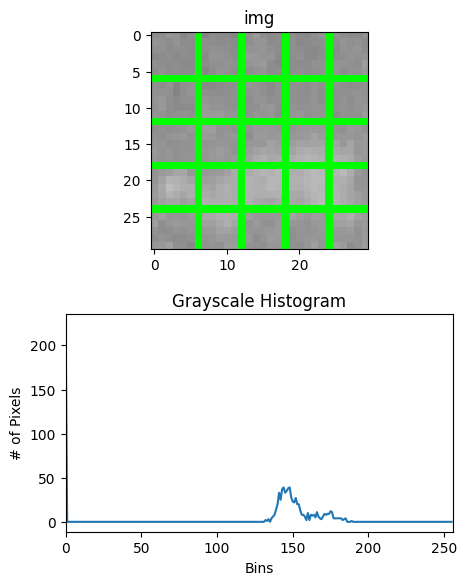

In [25]:
mode="c"
split=5
number=0
plot="true"
path_a= r"D:\Dementia_Data_Preprocessing\testing_data\1\20210825_t021252.jpg"
a=grid_segmentation_histogram(path_a,mode,split,number,plot)
#cv2.imwrite(r"C:\Users\jason\Facial-Recognition-FaceNet-master\img1\test.jpg",a)

image shape from (24, 32, 3) to (30, 30, 3)
mean_0: [[143.01666667]]


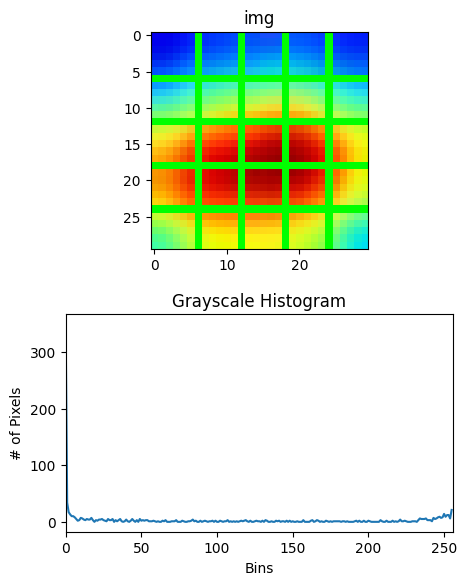

In [24]:
path_b= r"D:/test.jpg"
b=grid_segmentation_histogram(path_b,mode,split,number,plot)

## adjustment ssim

In [21]:
from skimage.measure import compare_ssim

def adjustment_ssim(img1, img2):
    
    aaa=img1.shape    
    bbb=img2.shape
    
    # print(aaa)
    # print(bbb)
    
    if aaa[0]>bbb[0] and aaa[1]>bbb[1]:
        img1=cv2.resize(img1, (bbb[1], bbb[0]))
    elif aaa[0]<bbb[0] and aaa[1]<bbb[1]:
        img2=cv2.resize(img2, (aaa[1], aaa[0]))
    
    # print(img1.shape)
    # print(img2.shape)
    
    (score, diff) = compare_ssim(img1, img2, full=True , multichannel=True)
    
    return score

adjustment_ssim(a,b)

C:\Users\jason\anaconda3\envs\tf13\lib\site-packages\ipykernel_launcher.py:19: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


0.646764861068054

## 測試

In [ ]:
import os


# 修改路徑
directory_name= r"D:\OCR\id\final_test\right_id\T"

# 評分標準
path = r"D:\OCR\id\final_test\right_id\T\2020_08_02_07_33_28_0.9947113394737244.jpg"
metric = grid_segmentation_histogram(path,'c',3,1,'true')


score_list=[]
count=0
for filename in os.listdir(directory_name):   
    count=count+1 
    a=grid_segmentation_histogram(directory_name + "\\" + filename,'c',3,1,'true')
    adjustment_ssim(a,metric)         
    print(" ")
    

print("finish!")
print(f"全部張數:{count}張")
print("最低分:",min(score_list))

In [ ]:
import os


# 修改路徑
directory_name= r"D:\OCR\id\final_test\right_id\1"

# 評分標準
path = r"D:\OCR\id\final_test\right_id\1\2020_08_02_05_46_48_0.9895700216293335.jpg"
metric = grid_segmentation_histogram(path,'c',3,1,'true')


score_list=[]
name_list=[]
count=0
for filename in os.listdir(directory_name):   
    count=count+1 
    a=grid_segmentation_histogram(directory_name + "\\" + filename,'c',3,1,'tru')
    c=adjustment_ssim(a,metric)         
    (score, diff) = compare_ssim(c[0], c[1], full=True,multichannel=True)
    if score==0.11434860067965065:
        name_list.append(filename)
    score_list.append(score)
    print("SSIM: {}".format(score))
    print(" ")
    

print("finish!")
print(f"全部張數:{count}張")
print("最低分:",min(score_list))
print(name_list)

## test: 1 and T

In [ ]:
import os


directory_name= r"D:\OCR\id\final_test\right_id\T"
mode="c"
split=3
number=1
plot="true"


# 評分標準
#亮度70
path_1_lv1 = r"D:\OCR\id\final_test\right_id\1\2020_08_02_05_46_48_0.9895700216293335.jpg"
metric_1_lv1 = grid_segmentation_histogram(path_1_lv1,mode,split,number,plot)
path_T_lv1 = r"D:\OCR\id\final_test\right_id\T\2020_08_02_07_33_28_0.9947113394737244.jpg"
metric_T_lv1 = grid_segmentation_histogram(path_T_lv1,mode,split,number,plot)
#亮度115
path_1_lv2 = r"D:\OCR\id\final_test\right_id\1\2020_08_02_11_28_35_0.9921512603759766.jpg"
metric_1_lv2 = grid_segmentation_histogram(path_1_lv2,mode,split,number,plot)
path_T_lv2 = r"D:\OCR\id\final_test\right_id\T\2020_08_07_00_32_35_0.7989924550056458.jpg"
metric_T_lv2 = grid_segmentation_histogram(path_T_lv2,mode,split,number,plot)
#亮度160
path_1_lv3 = r"D:\OCR\id\final_test\right_id\1\2020_08_10_09_04_00_0.8972874879837036.jpg"
metric_1_lv3 = grid_segmentation_histogram(path_1_lv3,mode,split,number,plot)
path_T_lv3 = r"D:\OCR\id\final_test\right_id\T\2020_08_10_09_01_01_0.9912859201431274.jpg"
metric_T_lv3 = grid_segmentation_histogram(path_T_lv3,mode,split,number,plot)

print(" ")

#################################################################################################################################
print("######################################## start ###################################################")
list_1=[]
list_T=[]
count=0
count_1=0
count_T=0
mean_list=[]
for filename in os.listdir(directory_name): 
    print(filename)
    count=count+1 
    test=grid_segmentation_histogram(directory_name + "\\" + filename,mode,split,number,plot)
    
    
    gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
    (mean , stddv) = cv2.meanStdDev(gray)
    
    mean1=abs(mean-70)
    mean2=abs(mean-115)
    mean3=abs(mean-160)
    
    mean_list.append(mean1)
    mean_list.append(mean2)
    mean_list.append(mean3)
    
    if min(mean_list)==mean1:
        score1=adjustment_ssim(metric_1_lv1,test) 
        score2=adjustment_ssim(metric_T_lv1,test)
    elif min(mean_list)==mean2:
        score1=adjustment_ssim(metric_1_lv2,test) 
        score2=adjustment_ssim(metric_T_lv2,test)
    elif min(mean_list)==mean3:
        score1=adjustment_ssim(metric_1_lv3,test) 
        score2=adjustment_ssim(metric_T_lv3,test)    
    
    
    if score1>score2:
        count_1=count_1+1
        list_1.append(filename)
        print("it is 1")
    else:
        count_T=count_T+1
        list_T.append(filename)
        print("it is T")
        
    print(" ")
    

print(f"全部張數:{count}張")
print(f"判斷是1:{count_1}張")
print(f"判斷是T:{count_T}張")


## test: E and F

In [43]:
import os


directory_name= r"D:\OCR\id\final_test\error_id_v3\fakeE_trueF"
mode="c"
split=3
number=3
plot="tru"

# 評分標準
#亮度70
path_1_lv1 = r"D:\OCR\id\final_test\right_id\F\2020_08_02_06_02_28_0.9903936982154846.jpg"
metric_1_lv1 = grid_segmentation_histogram(path_1_lv1,mode,split,number,plot)

find=[]
score=[]
count=0
for filename in os.listdir(directory_name):
    
    print(filename)
    count=count+1 
    test=grid_segmentation_histogram(directory_name + "\\" + filename,mode,split,number,plot)
    
    
    gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
    (mean , stddv) = cv2.meanStdDev(gray)
    score1=adjustment_ssim(metric_1_lv1,test) 
    
    print(score1)
    if score1==-0.022008512025814626:
        find.append(filename)
    elif score1==0.13484974230093572:
        find.append(filename)
    else:
        score.append(score1)
        
        
    print(" ")
    

    
print(max(score))

image shape from (56, 39, 3) to (57, 57, 3)
meanc: [[74.80701754]]
2020_08_02_06_23_33_0.38568776845932007.jpg
image shape from (45, 32, 3) to (45, 45, 3)
meanc: [[105.58518519]]
0.2541184001542406
 
2020_08_03_03_41_02_0.9757845997810364.jpg
image shape from (56, 36, 3) to (57, 57, 3)
meanc: [[110.70544783]]
0.3715303533947778
 
2020_08_03_15_20_55_0.9584804773330688.jpg
image shape from (57, 37, 3) to (57, 57, 3)
meanc: [[77.72206833]]
0.5231339650307133
 
2020_08_04_14_42_17_0.9186088442802429.jpg
image shape from (52, 35, 3) to (51, 51, 3)
meanc: [[82.57554787]]
0.5054590034929266
 
2020_08_06_10_07_53_0.9774645566940308.jpg
image shape from (58, 37, 3) to (57, 57, 3)
meanc: [[66.15697138]]
0.5728615211852347
 
2020_08_07_07_10_11_0.9119237065315247.jpg
image shape from (57, 39, 3) to (57, 57, 3)
meanc: [[67.75715605]]
0.5082728972832055
 
2020_08_07_10_08_06_0.941586434841156.jpg
image shape from (51, 34, 3) to (51, 51, 3)
meanc: [[86.78662053]]
0.322551180660082
 
2020_08_07_10_3

C:\Users\jason\anaconda3\envs\tf13\lib\site-packages\ipykernel_launcher.py:19: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [37]:
print(find)

[]
